
Implémentez un modèle de scoring

#Chargement des données

In [ ]:
import pandas as pd

# Lire le fichier CSV avec pandas
df = pd.read_csv('df_clean.csv', sep = ',')

In [2]:
#les premières lignes du dataframe
print(df.shape)
df.head()

(356251, 770)


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Sent proposal_MAX,CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,False,0.0,0.0,0.0,False,False,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(df)

['SK_ID_CURR',
 'TARGET',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356251 entries, 0 to 356250
Columns: 770 entries, SK_ID_CURR to CC_COUNT
dtypes: bool(133), float64(584), int64(42), object(11)
memory usage: 1.7+ GB


#Les valeurs manquantes

In [7]:
#le pourcentage de valeurs manquantes pour chaque colonne
valeur_m_p = df.isnull().mean() * 100

#les colonnes avec plus de 70% de valeurs manquantes
valeur_m_cols = valeur_m_p[valeur_m_p > 70].index

#le nombre de colonnes avec plus de 70% de valeurs manquantes
nb_valeur_m_cols = valeur_m_cols.shape[0]
print(f"Le nombre de colonnes avec plus de 70% de valeurs manquantes: {nb_valeur_m_cols}")

Le nombre de colonnes avec plus de 70% de valeurs manquantes: 144


In [6]:
#le nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

TARGET                                  48744
AMT_ANNUITY                                36
AMT_GOODS_PRICE                           278
DAYS_EMPLOYED                           64648
OWN_CAR_AGE                            235239
                                        ...  
CC_NAME_CONTRACT_STATUS_Signed_MAX     252693
CC_NAME_CONTRACT_STATUS_Signed_MEAN    252693
CC_NAME_CONTRACT_STATUS_Signed_SUM     252693
CC_NAME_CONTRACT_STATUS_Signed_VAR     253385
CC_COUNT                               252693
Length: 590, dtype: int64


In [8]:
#la suppression des colonnes avec plus de 70% de valeurs manquantes
df = df.drop(columns=valeur_m_cols)

print(f"Le nombre de colonnes restantes après suppression: {df.shape[1]}")
print(f"Le nombre de colonnes supprimées: {len(valeur_m_cols)}")

Le nombre de colonnes restantes après suppression: 626
Le nombre de colonnes supprimées: 144


In [9]:
#je ne garde que les donneées où la colonne 'TARGET' n'est pas vide.
# 'TARGET' est la variable à prédire (classification), donc ces données sont nécessaires pour l'entraînement.
df_classification = df[df['TARGET'].notnull()]
print(df_classification.shape)

(307507, 626)


In [10]:
#les colonnes cat
cat_cols = df_classification.select_dtypes(include=['object']).columns
print(cat_cols)

Index([], dtype='object')


Après la suppression des cols à >70% de valeurs manquantes, il ne reste plus de cols cat.

In [19]:
#le df sans imputation (avec nan)
df_classification.to_csv('df_classification.csv', index=False)

#Imputation

In [11]:
#je remplace les valeurs manquantes par la moyenne des colonnes numériques
df_classification_imputed = df_classification.copy()
df_classification_imputed.fillna(df_classification.mean(), inplace=True)

In [12]:
#vérification qu'il n'y a plus de valeurs manquantes
print(df_classification_imputed.isnull().sum().sum())

0


In [13]:
#le df avec imputation mean en csv
df_classification_imputed.to_csv('df_classification_imputed.csv', index=False)

In [14]:
df = pd.read_csv('df_classification_imputed.csv', sep = ',')
df.shape

(307507, 626)

#début modif

##standarisation des données

In [ ]:
'''df = df_classification_imputed'''

In [ ]:
'''from sklearn.preprocessing import StandardScaler

# Sélection des colonnes numériques
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialisation du scaler
scaler = StandardScaler()

# Application du scaler aux colonnes numériques
df[num_cols] = scaler.fit_transform(df[num_cols])

# Vérification que les données sont standardisées (moyenne ≈ 0, écart type ≈ 1)
print(df[num_cols].mean())
print(df[num_cols].std())'''


SK_ID_CURR                        3.016792e-16
TARGET                            3.075482e-17
CODE_GENDER                       1.506547e-17
FLAG_OWN_CAR                      2.098075e-17
FLAG_OWN_REALTY                   5.222081e-17
                                      ...     
INSTAL_AMT_PAYMENT_SUM           -9.614637e-17
INSTAL_DAYS_ENTRY_PAYMENT_MAX     9.769451e-17
INSTAL_DAYS_ENTRY_PAYMENT_MEAN   -8.609502e-17
INSTAL_DAYS_ENTRY_PAYMENT_SUM     4.243519e-17
INSTAL_COUNT                     -1.152324e-16
Length: 493, dtype: float64
SK_ID_CURR                        1.000002
TARGET                            1.000002
CODE_GENDER                       1.000002
FLAG_OWN_CAR                      1.000002
FLAG_OWN_REALTY                   1.000002
                                    ...   
INSTAL_AMT_PAYMENT_SUM            1.000002
INSTAL_DAYS_ENTRY_PAYMENT_MAX     1.000002
INSTAL_DAYS_ENTRY_PAYMENT_MEAN    1.000002
INSTAL_DAYS_ENTRY_PAYMENT_SUM     1.000002
INSTAL_COUNT             

In [18]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import gc
import time
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import optuna
import logging
from imblearn.over_sampling import SMOTE

c:\Users\HP\OneDrive\Documents\P7_opc\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
#configuration de l'environnement d'expérience dans MLflow
# Initialiser MLFlow
mlflow.set_experiment('LightGBM')

2024/10/15 12:55:54 INFO mlflow.tracking.fluent: Experiment with name 'LightGBM' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/HP/OneDrive/Documents/P7_opc/mlruns/298646239419190832', creation_time=1728989754862, experiment_id='298646239419190832', last_update_time=1728989754862, lifecycle_stage='active', name='LightGBM', tags={}>

In [21]:
#la préparation des données

#le nombre d'exemples pour chaque classe (TARGET 0 et 1)
nb_0 = (df_classification['TARGET'] == 0).sum()
nb_1 = (df_classification['TARGET'] == 1).sum()

X = df_classification.drop(columns=["TARGET", "SK_ID_CURR"])
y = df_classification["TARGET"]

#les caractéristiques sont normalisées avec StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
#la validation croisée

#pour diviser les données en 5 sous-ensembles
cv = StratifiedKFold(n_splits=5)
#pour gérer le déséquilibre des classes
class_weights = {0: 1, 1: nb_0 / nb_1}


In [ ]:
#les hyperparamètres à optimiser

def objective(trial):
    lr = trial.suggest_float('lr', 0.001, 0.1, log=True)
    num_leaves = trial.suggest_int('num_leaves', 31, 70)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)


In [ ]:
#entrainement et évaluation du modèle

#un modèle LGBMClassifier est créé avec les hyperparamètres spécifiés
#cross_val_predict est utilisé pour effectuer une validation croisée et obtenir les probabilités prédites y_prob
#le code évalue les performances du modèle en calculant le AUC, la précision et un coût métier basé sur les faux positifs (FP) et les faux négatifs (FN)

model = LGBMClassifier(learning_rate=lr, num_leaves=num_leaves, n_estimators=n_estimators, class_weight=class_weights, verbose=-1)


In [ ]:
#suivi avec MLflow

#les résultats sont enregistrés dans MLflow, incluant les paramètres, les métriques de performance et la courbe ROC
with mlflow.start_run():
    mlflow.log_param("Learning Rate", lr)
    mlflow.log_param("Num Leaves", num_leaves)
    mlflow.log_param("N Estimators", n_estimators) 
    mlflow.log_param("Threshold", round(threshold, 2))
    mlflow.log_metric("AUC", auc)
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("Business Score", cost)

    # Enregistrer les temps dans mlflow
    mlflow.log_metric("Fit Time", fit_duration)
    mlflow.log_metric("Prediction Time", pred_duration)
    
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")


In [ ]:
#optimisation avec Optuna

#la fonction objective est optimisée pour un nombre total de combinaisons défini (total_combinations)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=total_combinations, callbacks=[lambda study, trial: print_progress(study, trial, total_combinations)])


In [ ]:
#les résultats de toutes les tentatives sont stockés dans un DataFrame pour analyse
results_df = pd.DataFrame(results)


In [25]:
#pour obtenir un échantillon stratifié en fonction de la distribution de la classe

# La taille de l'échantillon total
sample_size = 50000

# Calcul de la proportion des classes
class_distribution = df_classification_imputed['TARGET'].value_counts(normalize=True)

# Échantillon stratifié en fonction de la distribution de 'TARGET'
df_sample = df_classification_imputed.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(int(sample_size * class_distribution.loc[x.name]), random_state=42))

# Distribution dans l'échantillon
print(df_sample['TARGET'].value_counts(normalize=True))

C:\Users\HP\AppData\Local\Temp\ipykernel_6736\3736971366.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df_classification_imputed.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(int(sample_size * class_distribution.loc[x.name]), random_state=42))


TARGET
0.0    0.919278
1.0    0.080722
Name: proportion, dtype: float64


In [26]:
df_sample.to_csv('df_sample.csv', index=False)


In [27]:
#lightGBM ne prend pas en charge les caractères spéciaux dans les noms de colonnes donc je les supprime
import re

#la fonction pour nettoyer les noms de colonnes
def clean_column_names(df):
    df.columns = [re.sub(r'\W+', '_', col) for col in df.columns]
    return df

#j'applique la fonction à X_train et X_val
df_sample = clean_column_names(df_sample)


#maintenant les colonnes ne contiennent plus de caractères spéciaux

In [31]:
# Configuration du logger Optuna
logging.getLogger('optuna').setLevel(logging.CRITICAL)

# Démarrage du chronomètre
start_time = time.time()

# Configuration initiale de MLflow
mlflow.set_experiment('LightGBM')

# Séparer les features et la cible
X = df_sample.drop(columns=["TARGET", "SK_ID_CURR"])
y = df_sample["TARGET"]

# Standardisation des features (en maintenant le DataFrame pour les indices)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

# Configuration de la validation croisée
cv = StratifiedKFold(n_splits=5)

# Définition de SMOTE pour traiter l'imbalance des classes
smote = SMOTE()

results = []
total_combinations = 50

def objective(trial):
    # Hyperparamètres à optimiser
    model = LGBMClassifier(
        learning_rate=trial.suggest_float('lr', 0.001, 0.1, log=True),
        num_leaves=trial.suggest_int('num_leaves', 31, 70),
        n_estimators=trial.suggest_int('n_estimators', 100, 1000, log=True),
        verbose=-1
    )
    
    auc_scores, acc_scores, cost_scores = [], [], []
    
    # Validation croisée avec suréchantillonnage SMOTE
    for train_idx, test_idx in cv.split(X_scaled, y):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Application de SMOTE sur les données d'entraînement
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        
        # Entraîner le modèle avec les données SMOTE
        model.fit(X_train_smote, y_train_smote)
        
        # Prédictions de probabilités
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Définir un seuil (threshold) pour classer les résultats
        threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)
        y_pred = y_prob > threshold
        
        # Évaluation des métriques
        auc_scores.append(roc_auc_score(y_test, y_prob))
        acc_scores.append(accuracy_score(y_test, y_pred))
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        cost_scores.append(fp + 10 * fn)
    
    # Calculer la moyenne des résultats sur les plis
    auc = np.mean(auc_scores)
    acc = np.mean(acc_scores)
    cost = np.mean(cost_scores)
    
    results.append({"AUC": auc, "Accuracy": acc, "Business Score": cost})

    # Enregistrement avec MLflow
    with mlflow.start_run():
        mlflow.log_params(trial.params)
        mlflow.log_metrics({"AUC": auc, "Accuracy": acc, "Business Score": cost})

        # Courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")
    
    gc.collect()
    return cost

# Optimisation avec Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=total_combinations)

# Affichage des résultats
results_df = pd.DataFrame(results)
print(study.best_params)

# Sauvegarde des résultats stylisés
styled_df_LGM = results_df.sort_values(by='Business Score')
styled_df_LGM.to_csv('results_LGM.csv', index=False)

def highlight_max(s):
    return ['background-color: green' if v == s.max() else '' for v in s]

def highlight_min(s):
    return ['background-color: green' if v == s.min() else '' for v in s]

styled_df_LGM = (styled_df_LGM.style
                 .apply(highlight_max, subset=['AUC', 'Accuracy'])
                 .apply(highlight_min, subset=['Business Score'])
                 .format({'Threshold': "{:g}"}))

# Fin du chronomètre
end_time = time.time()
print(f"Temps d'exécution total: {end_time - start_time:.2f} secondes")




2024/10/15 14:58:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/15 15:23:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/15 15:29:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/15 15:44:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/15 15:52:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/15 16:05:39 

{'lr': 0.002332225147008313, 'num_leaves': 69, 'n_estimators': 164, 'threshold': 0.4}
Temps d'exécution total: 28496.85 secondes


In [32]:
df_results_LGM = pd.read_csv("results_LGM.csv", sep =",")
df_results_LGM

,AUC,Accuracy,Business Score
0,0.671180,0.631553,6422.2
1,0.666429,0.724035,6518.0
2,0.676555,0.772575,6687.8
3,0.660806,0.741615,6698.6
4,0.666149,0.759995,6705.6
5,0.674639,0.779896,6724.4
6,0.640360,0.655353,6744.0
7,0.669386,0.774455,6746.4
8,0.654600,0.737855,6750.6
9,0.650562,0.731294,6758.6


In [33]:
print(study.best_params)


{'lr': 0.002332225147008313, 'num_leaves': 69, 'n_estimators': 164, 'threshold': 0.4}


In [34]:
# Affichage des meilleurs paramètres
best_params = study.best_params
print("Les meilleurs paramètres optimisés sont :")
for param, value in best_params.items():
    print(f"{param}: {value}")


Les meilleurs paramètres optimisés sont :
lr: 0.002332225147008313
num_leaves: 69
n_estimators: 164
threshold: 0.4


In [35]:
# Affichage du meilleur score de l'objectif
best_score = study.best_value
print(f"Le score optimal de l'objectif (Business Score minimisé) est : {best_score}")


Le score optimal de l'objectif (Business Score minimisé) est : 6422.2


In [38]:
#entraînement d'un nouveau modèle LightGBM avec les meilleurs paramètres
best_model = LGBMClassifier(**study.best_params)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
best_model.fit(X_resampled, y_resampled)



LGBMClassifier(lr=0.002332225147008313, n_estimators=164, num_leaves=69,
               threshold=0.4)

l'importance relative de chaque variable (feature) dans la prédiction du modèle LightGBM.
l'importance des features est calculée en fonction de la contribution de chaque feature à la réduction de l'erreur prédictive au cours des différents splits dans les arbres de décision. Les chiffres correspondent à combien chaque variable a contribué à l'amélioration de la performance globale du modèle.

Chiffres élevés : Variables très importantes pour les prédictions.
Chiffres faibles ou nuls : Variables peu ou pas utilisées dans la modélisation.

In [39]:
#calcule et affichage des importances des features
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_scaled.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)



                                    Feature  Importance
31                             EXT_SOURCE_2         265
32                             EXT_SOURCE_3         214
30                             EXT_SOURCE_1         133
0                               CODE_GENDER         130
244                            PAYMENT_RATE         113
..                                      ...         ...
121                NAME_INCOME_TYPE_Student           0
86                          FLAG_DOCUMENT_7           0
591  POS_NAME_CONTRACT_STATUS_Canceled_MEAN           0
83                          FLAG_DOCUMENT_4           0
14                               FLAG_MOBIL           0

[624 rows x 2 columns]


In [47]:
# Calcul du pourcentage d'importance de chaque feature
importance_df['Importance (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100

# Afficher les importances en pourcentage
print(importance_df[['Feature', 'Importance', 'Importance (%)']])


                                    Feature  Importance  Importance (%)
31                             EXT_SOURCE_2         265        2.376255
32                             EXT_SOURCE_3         214        1.918938
30                             EXT_SOURCE_1         133        1.192611
0                               CODE_GENDER         130        1.165710
244                            PAYMENT_RATE         113        1.013271
..                                      ...         ...             ...
121                NAME_INCOME_TYPE_Student           0        0.000000
86                          FLAG_DOCUMENT_7           0        0.000000
591  POS_NAME_CONTRACT_STATUS_Canceled_MEAN           0        0.000000
83                          FLAG_DOCUMENT_4           0        0.000000
14                               FLAG_MOBIL           0        0.000000

[624 rows x 3 columns]


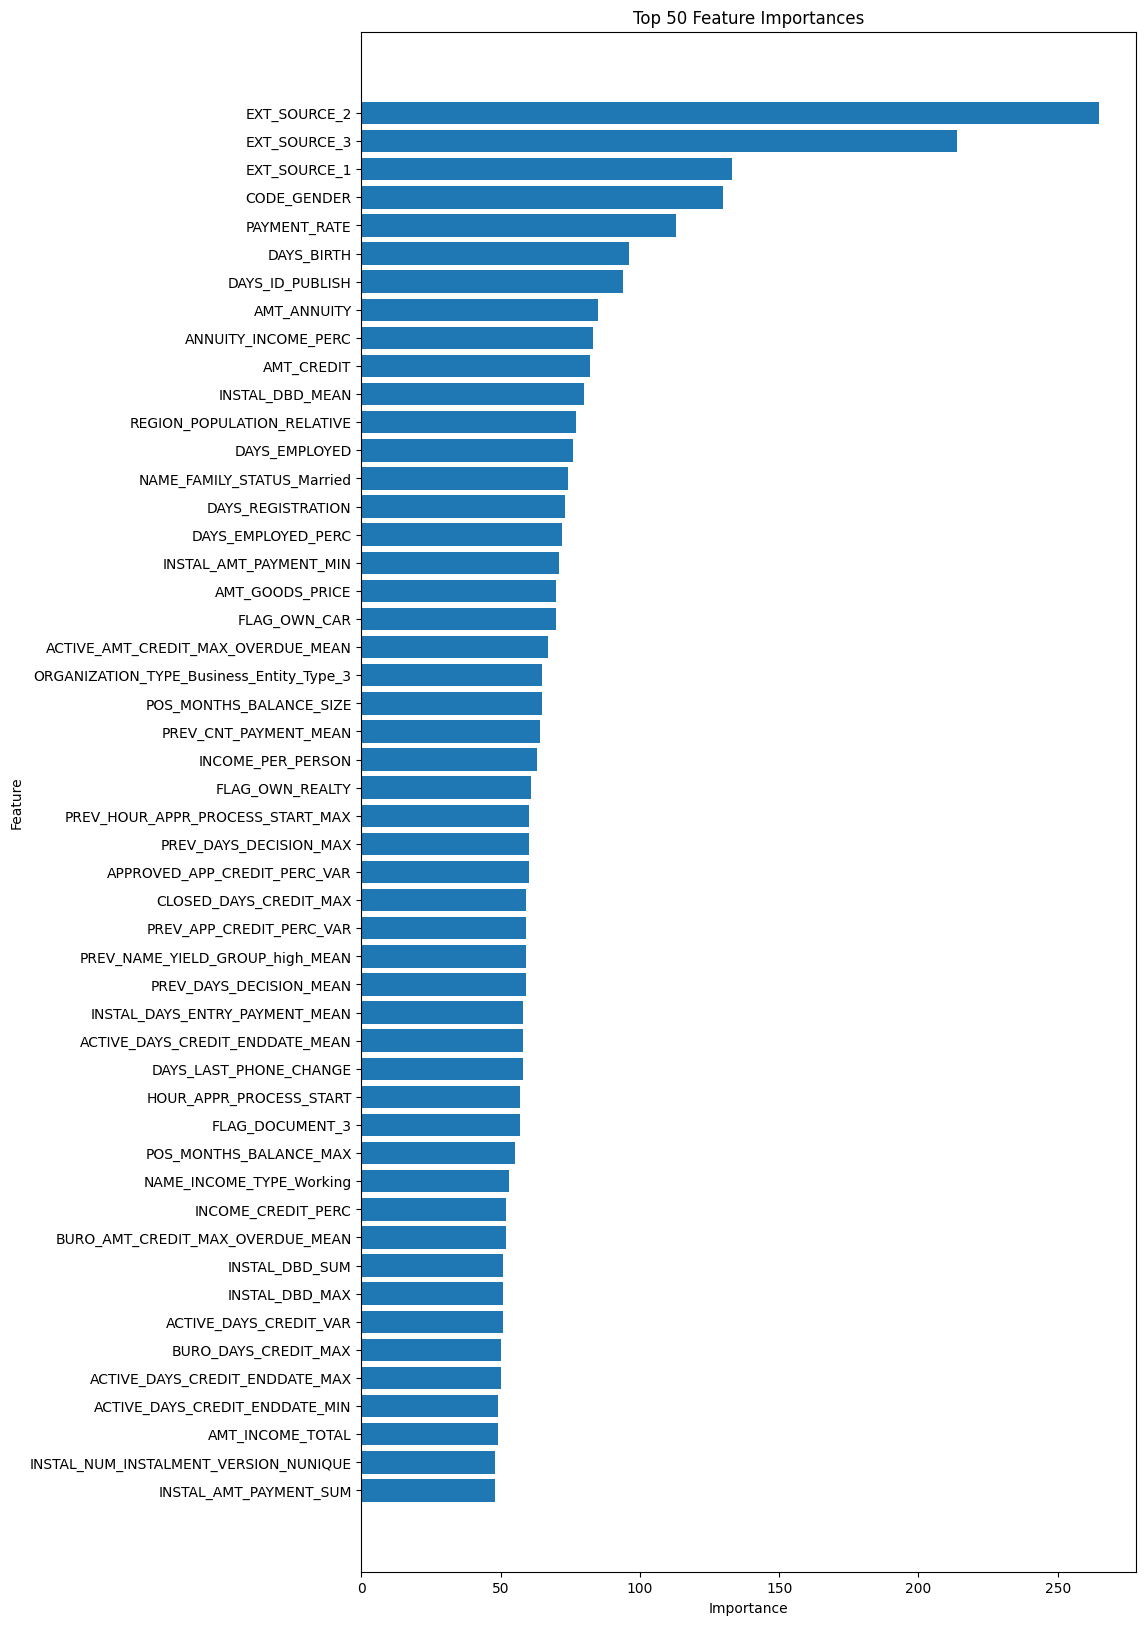

In [46]:
#la visualisation de l'importance des features

# Afficher uniquement les 50 premières features par importance
top_50_features = importance_df.head(50)

# Visualisation des 50 premières importances des features
plt.figure(figsize=(10, 20))
plt.barh(top_50_features['Feature'], top_50_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 50 Feature Importances')
plt.gca().invert_yaxis()  # Pour que les plus importantes soient en haut
plt.show()




pour l'api

In [48]:


# La taille de l'échantillon total
sample_size = 1000

# Échantillon stratifié en fonction de la distribution de 'TARGET'
df_test = df_classification_imputed.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(int(sample_size * class_distribution.loc[x.name]), random_state=42))

# Distribution dans l'échantillon
print(df_sample['TARGET'].value_counts(normalize=True))

TARGET
0.0    0.919278
1.0    0.080722
Name: proportion, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_6736\2011476186.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_classification_imputed.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(int(sample_size * class_distribution.loc[x.name]), random_state=42))


In [49]:
df_test.to_csv('df_test.csv', index=False)

#fin modif

#Echantillon


Dans mon df la target est déséquilibrée : environ 90% sont de la classe 0 (négatif), et seulement 10% sont de la classe 1 (positif).

Donc mon modèle pourrait prédire la majorité comme étant de la classe 0 sans optimiser la performance, surtout pour la classe 1


Pour mieux gérer ce déséquilibre, je vais utiliser deux approches :


**SMOTE (Synthetic Minority Over-sampling Technique)** : c'est une technique d'augmentation de données qui permet de créer des données synthétiques de la classe minoritaire (ici 1) pour équilibrer les classes.

**F-beta score (avec β=10)** : c'est une métrique d'évaluation qui permet de pénalizer davantage les faux négatifs (FN, erreurs coûteuses).

___________________________________________________

C'est pour mieux gérer le déséquilibre de classes et optimiser les performances des modèles sur la classe minoritaire


In [ ]:
import pandas as pd

#la taille de l'échantillon total
sample_size = 50000

#je calcule la proportion des classes
class_distribution = df_classification_imputed['TARGET'].value_counts(normalize=True)

#échantillon stratifié en fonction de la distribution de 'TARGET'
df_sample = df_classification_imputed.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(int(sample_size * class_distribution.loc[x.name]), random_state=42))

#la distribution dans l'échantillon
print(df_sample['TARGET'].value_counts(normalize=True))


TARGET
0.0    0.919278
1.0    0.080722
Name: proportion, dtype: float64


- TARGET = 1 -> Client avec des difficultés de payments
- TARGET = 0 -> Client sans difficultés de payments

In [ ]:
df_sample.to_csv('/content/df_sample.csv', index=False)

In [ ]:
import pandas as pd

#pour obtenir un échantillon stratifié en fonction de la distribution de la classe

# La taille de l'échantillon total
sample_size = 50000

# Calcul de la proportion des classes
class_distribution = df_classification_imputed['TARGET'].value_counts(normalize=True)

# Échantillon stratifié en fonction de la distribution de 'TARGET'
df_sample = df_classification_imputed.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(int(sample_size * class_distribution.loc[x.name]), random_state=42))

# Distribution dans l'échantillon
print(df_sample['TARGET'].value_counts(normalize=True))


TARGET
0.0    0.919278
1.0    0.080722
Name: proportion, dtype: float64


#Entrainement des modeles avec tracking MLFlow

In [ ]:
import pandas as pd

df_sample = pd.read_csv('/content/df_sample.csv')
df_sample.shape

(49999, 626)

In [ ]:
#lightGBM ne prend pas en charge les caractères spéciaux dans les noms de colonnes donc je les supprime
import re

#la fonction pour nettoyer les noms de colonnes
def clean_column_names(df):
    df.columns = [re.sub(r'\W+', '_', col) for col in df.columns]
    return df

#j'applique la fonction à X_train et X_val
df_sample = clean_column_names(df_sample)


#maintenant les colonnes ne contiennent plus de caractères spéciaux

##SMOTE

J'utilise **X_train_resampled et y_train_resampled** pour l'**entraînement**.

J'utilise **X_val et y_val (sans SMOTE)** pour la **validation**, car il est important de ne pas modifier l'ensemble de validation avec SMOTE.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Une fois que j'ai df_sample, j'applique SMOTE pour équilibrer les classes

# Séparer les features et la cible
X = df_sample.drop(columns=["TARGET", "SK_ID_CURR"])
y = df_sample["TARGET"]

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Application de SMOTE sur l'ensemble d'entraînement
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Afficher la nouvelle distribution des classes après SMOTE
print(pd.Series(y_train_resampled).value_counts(normalize=True))

# Vérifier les dimensions des ensembles
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


TARGET
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64
X_train_resampled shape: (73540, 624)
y_train_resampled shape: (73540,)
X_val shape: (10000, 624)
y_val shape: (10000,)


In [ ]:
#j'install MLFlow
! pip install mlflow

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import mlflow
import mlflow.sklearn

###random_forest_default

In [ ]:
#l'expérience MLFlow : RandomForestClassifier
mlflow.set_experiment("RandomForestClassifier")

# RUN 1 : random_forest_default

#initialisation du RandomForestClassifier avec hyperparamètres par défaut
rf_clf = RandomForestClassifier()

with mlflow.start_run(run_name='random_forest_default'):
    #l'enregistrement des hyperparamètres
    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", None)
    mlflow.log_param("random_state", None)

    #l'entraînement du modèle
    rf_clf.fit(X_train_resampled, y_train_resampled)

    #la prédictions
    y_pred_rf = rf_clf.predict(X_val)
    y_prob_rf = rf_clf.predict_proba(X_val)[:, 1]

    #les métriques
    try:
        auc_score_rf = roc_auc_score(y_val, y_prob_rf)
    except ValueError:
        auc_score_rf = float('nan')

    accuracy_rf = accuracy_score(y_val, y_pred_rf)

    #l'enregistrement des métriques
    mlflow.log_metric("auc", auc_score_rf)
    mlflow.log_metric("accuracy", accuracy_rf)

    # Enregistrer le modèle dans MLflow (avec signature et input_example pour faciliter le serving)
    model_uri = mlflow.sklearn.log_model(
        rf_clf,
        artifact_path="random_forest_model",
        #input_example=X_val[:5]  # Exemple d'entrée pour la prédiction
    )

    # Enregistrer le modèle dans le Model Registry
    model_name = "RandomForestModel"  # Nom du modèle dans le registre
    mlflow.register_model(model_uri=model_uri.model_uri, name=model_name)

    # Promouvoir le modèle vers 'Staging'
    client = mlflow.tracking.MlflowClient()
    client.transition_model_version_stage(
        name=model_name,
        version=1,  # Vous pouvez choisir la version manuellement ou automatiser
        stage="Staging"  # Les stages peuvent être 'None', 'Staging', 'Production' ou 'Archived'
    )



#pour vérification
print(f"Random Forest AUC: {auc_score_rf}, Accuracy: {accuracy_rf}")


2024/09/27 07:52:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'RandomForestModel'.
Created version '1' of model 'RandomForestModel'.
<ipython-input-32-e9d7aa98dc85>:48: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


Random Forest AUC: 0.6948609678367693, Accuracy: 0.9193


In [ ]:
#pour vérifier que mon modèle est bien enregistré sur le dossier MLflow (Drive)
!ls

df_classification_imputed.csv  mlruns  projet7_1.ipynb	README.md


###random_forest_hyper1

In [ ]:
#l'expérience MLFlow : RandomForestClassifier
mlflow.set_experiment("RandomForestClassifier")

# RUN 2 : random_forest_hyper1

#initialisation du RandomForestClassifier avec hyperparamètres
rf_clf_h1 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)

with mlflow.start_run(run_name='random_forest_hyper1'):
    #l'enregistrement des hyperparamètres
    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("max_depth", 5)
    mlflow.log_param("random_state", 42)

    #l'entraînement du modèle
    rf_clf_h1.fit(X_train, y_train)

    #la prédictions
    y_pred_rf_h1 = rf_clf_h1.predict(X_val)
    y_prob_rf_h1 = rf_clf_h1.predict_proba(X_val)[:, 1]

    #les métriques
    try:
        auc_score_rf_h1 = roc_auc_score(y_val, y_prob_rf_h1)
    except ValueError:
        auc_score_rf_h1 = float('nan')

    accuracy_rf_h1 = accuracy_score(y_val, y_pred_rf_h1)

    #l'enregistrement des métriques
    mlflow.log_metric("auc_h1", auc_score_rf_h1)
    mlflow.log_metric("accuracy_h1", accuracy_rf_h1)

    #l'enregistrement du modèle Random Forest
    mlflow.sklearn.log_model(rf_clf_h1, "random_forest_model_h1")

#pour vérification
print(f"Random Forest AUC_h1: {auc_score_rf_h1}, Accuracy_h1: {accuracy_rf_h1}")

2024/09/27 07:57:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest AUC_h1: 0.7231446371498382, Accuracy_h1: 0.9193


In [ ]:
#pour vérifier que mon modèle est bien enregistré dans mlruns sur le dossier MLflow (Drive)
!ls

In [ ]:
mlflow.get_experiment_by_name("RandomForestClassifier")


Je vais utilier GridSearchCV : le modèle est entraîné avec toutes les combinaisons d'hyperparamètres spécifiées, et la meilleure combinaison est sélectionnée en fonction de la métrique de score :accuracy pour l'instant.

Ensuite, après avoir trouvé les meilleurs hyperparamètres, les prédictions sont effectuées, les métriques sont calculées

###random_forest_grid_search_cv

###random_forest_grid_search_score

In [ ]:
from sklearn.model_selection import GridSearchCV

#l'expérience MLFlow : RandomForestClassifier
mlflow.set_experiment("RandomForestClassifier")


#les hyperparamètres à explorer
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

# RUN 3 : random_forest_grid_search_cv

#initialisation du RandomForestClassifier
rf_clf_cv = RandomForestClassifier()

#la configuration de GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf_cv, param_grid=param_grid_rf, cv=5, scoring='accuracy')

#exécution de GridSearchCV
with mlflow.start_run(run_name='random_forest_grid_search_cv'):
    grid_search_rf.fit(X_train, y_train)

    #meilleurs paramètres et score
    best_params_rf = grid_search_rf.best_params_
    best_score_rf = grid_search_rf.best_score_

    #enregistrement des meilleurs paramètres
    mlflow.log_params(best_params_rf)
    mlflow.log_param("best_score", best_score_rf)

    #la prédictions avec les meilleurs paramètres
    y_pred_rf_cv = grid_search_rf.best_estimator_.predict(X_val)
    y_prob_rf_cv = grid_search_rf.best_estimator_.predict_proba(X_val)[:, 1]

    #calcul des métriques
    auc_score_rf_cv = roc_auc_score(y_val, y_prob_rf_cv)
    accuracy_rf_cv = accuracy_score(y_val, y_pred_rf_cv)

    #enregistrement des métriques
    mlflow.log_metric("auc_cv", auc_score_rf_cv)
    mlflow.log_metric("accuracy_cv", accuracy_rf_cv)

    #enregistrement du modèle RandomForest avec les meilleurs paramètres
    mlflow.sklearn.log_model(grid_search_rf.best_estimator_, "random_forest_best_model")

print(f"Best Random Forest Parameters: {best_params_rf}")
print(f"Random Forest AUC_cv: {auc_score_rf_cv}, Accuracy_cv: {accuracy_rf_cv}")

penalized_score = fp + 10 * fn

Je calcule le score en pénalisant les faux négatifs plus fortement

In [ ]:
from sklearn.metrics import confusion_matrix

#l'expérience MLFlow : RandomForestClassifier
mlflow.set_experiment("RandomForestClassifier")

#les hyperparamètres à explorer
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

# RUN 4
#initialisation du RandomForestClassifier
rf_clf = RandomForestClassifier()

#la configuration de GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

#exécution de GridSearchCV
with mlflow.start_run(run_name='random_forest_grid_search_score'):
    grid_search_rf.fit(X_train, y_train)

    # Meilleurs paramètres et score
    best_params_rf = grid_search_rf.best_params_
    best_score_rf = grid_search_rf.best_score_

    # Enregistrement des meilleurs paramètres
    mlflow.log_params(best_params_rf)
    mlflow.log_param("best_score", best_score_rf)

    # Prédictions avec les meilleurs paramètres
    y_pred_rf = grid_search_rf.best_estimator_.predict(X_val)

    # Calcul des métriques
    confusion = confusion_matrix(y_val, y_pred_rf)
    fp = confusion[0, 1]  # Faux positifs
    fn = confusion[1, 0]  # Faux négatifs

    penalized_score = fp + 10 * fn

    try:
        auc_score_rf = roc_auc_score(y_val, y_pred_rf)
    except ValueError:
        auc_score_rf = float('nan')

    accuracy_rf = accuracy_score(y_val, y_pred_rf)

    # Enregistrement des métriques
    mlflow.log_metric("auc", auc_score_rf)
    mlflow.log_metric("accuracy", accuracy_rf)
    mlflow.log_metric("penalized_score", penalized_score)

    # Enregistrement du modèle RandomForest avec les meilleurs paramètres
    mlflow.sklearn.log_model(grid_search_rf.best_estimator_, "random_forest_best_model_score")

print(f"Best Random Forest Parameters: {best_params_rf}")
print(f"Random Forest AUC: {auc_score_rf}, Accuracy: {accuracy_rf}, Penalized Score: {penalized_score}")

##Light GBM

###lightgbm_default

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, fbeta_score
import mlflow
import mlflow.sklearn
from mlflow.models import ModelSignature
from mlflow.types.schema import Schema, ColSpec
import os

# Initialisation du LightGBM avec hyperparamètres par défaut
lgb_clf = lgb.LGBMClassifier()

# MLflow expérience
mlflow.set_experiment("LightGBM_default_SMOTE")

with mlflow.start_run(run_name='lightgbm_with_SMOTE_and_fbeta'):
    # Enregistrement des hyperparamètres
    mlflow.log_param("model_type", "LGBMClassifier")
    mlflow.log_param("boosting_type", lgb_clf.boosting_type)
    mlflow.log_param("num_leaves", lgb_clf.num_leaves)
    mlflow.log_param("learning_rate", lgb_clf.learning_rate)
    mlflow.log_param("n_estimators", lgb_clf.n_estimators)
    mlflow.log_param("max_depth", lgb_clf.max_depth)

    # Entraînement du modèle sur les données resamplées
    lgb_clf.fit(X_train_resampled, y_train_resampled)

    # Prédictions sur le jeu de validation (non-resamplé)
    y_pred_lgb = lgb_clf.predict(X_val)
    y_prob_lgb = lgb_clf.predict_proba(X_val)[:, 1]

    # Calcul des métriques
    try:
        auc_score_lgb = roc_auc_score(y_val, y_prob_lgb)
    except ValueError:
        auc_score_lgb = float('nan')

    accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
    fbeta_lgb = fbeta_score(y_val, y_pred_lgb, beta=10)

    # Enregistrement des métriques
    mlflow.log_metric("auc", auc_score_lgb)
    mlflow.log_metric("accuracy", accuracy_lgb)
    mlflow.log_metric("fbeta_score", fbeta_lgb)

    # Enregistrement du modèle dans MLflow (modèle temporaire)
    model_uri = "lightgbm_model_with_SMOTE_and_fbeta"
    mlflow.sklearn.log_model(lgb_clf, model_uri)

    # Enregistrement du modèle dans le Model Registry
    model_name = "LightGBM_with_SMOTE_Model"
    registered_model_uri = mlflow.register_model(model_uri=f"runs:/{mlflow.active_run().info.run_id}/{model_uri}",
                                                 name=model_name)

# Résultats
print(f"LightGBM AUC: {auc_score_lgb}, Accuracy: {accuracy_lgb}, F-beta Score (β=10): {fbeta_lgb}")


2024/09/27 14:07:39 INFO mlflow.tracking.fluent: Experiment with name 'LightGBM_default_SMOTE' does not exist. Creating a new experiment.


[LightGBM] [Info] Number of positive: 36770, number of negative: 36770
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.879243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 115006
[LightGBM] [Info] Number of data points in the train set: 73540, number of used features: 608
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


2024/09/27 14:08:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LightGBM AUC: 0.751969435286344, Accuracy: 0.9179, F-beta Score (β=10): 0.042509469931420366


Successfully registered model 'LightGBM_with_SMOTE_Model'.
Created version '1' of model 'LightGBM_with_SMOTE_Model'.


**Conclusion :**

**Équilibrage des classes :**  

Number of positive: 36770

Number of negative: 36770

Cela indique que SMOTE a bien fonctionné


**Performance du modèle :**

**AUC de 0.75 :**

Ce score AUC (Area Under the Curve) indique une performance de classification correcte, mais pas exceptionnelle.

Un score de 0.75 signifie que le modèle est capable de séparer correctement les classes positives et négatives dans environ 75 % des cas.


**Accuracy de 91.79% :**

Le modèle est très précis, mais cela peut être dû au déséquilibre des classes dans l'ensemble de validation, même après SMOTE sur l'entraînement.

Il y a probablement beaucoup plus de classes négatives que positives, ce qui conduit à une haute précision.

**F-beta Score (β=10) de 0.042 :**

Ce score est très faible, ce qui montre que le modèle a des difficultés à identifier les classes positives.

Le F-beta avec β=10 pénalise fortement les faux négatifs, et un faible score ici suggère que le modèle manque beaucoup de véritables positifs.


**Version du modèle :** Une nouvelle version du modèle a été créée dans le Model Registry sous le nom LightGBM_with_SMOTE_Model, et c'est maintenant la version 3.

**Conclusion générale :**

Bien que le modèle affiche une haute précision et un AUC décent, son très faible F-beta score indique qu'il n'est pas bien adapté pour gérer le déséquilibre des classes lors de la prédiction des positifs.

###lightgbm_hyper

In [ ]:
#l'expérience MLFlow : LightGBM
mlflow.set_experiment("LightGBM")

# RUN 2: lightgbm_hyper

#initialisation du LightGBM avec des hyperparamètres personnalisés
lgb_clf_h1 = lgb.LGBMClassifier(
    num_leaves=50,          #j'augmenter le nombre de feuilles
    max_depth=10,           #la profondeur des arbres
    learning_rate=0.05,     #je diminue le taux d'apprentissage
    n_estimators=200        #j'augmenter le nombre d'estimations (arbres)
)

with mlflow.start_run(run_name='lightgbm_custom_h1'):
    #enregistrement des hyperparamètres personnalisés
    mlflow.log_param("model_type", "LGBMClassifier")
    mlflow.log_param("boosting_type", lgb_clf_h1.boosting_type)  #c'était 'gbdt' par défaut
    mlflow.log_param("num_leaves", lgb_clf_h1.num_leaves)
    mlflow.log_param("learning_rate", lgb_clf_h1.learning_rate)
    mlflow.log_param("n_estimators", lgb_clf_h1.n_estimators)
    mlflow.log_param("max_depth", lgb_clf_h1.max_depth)

    #entraînement du modèle
    lgb_clf_h1.fit(X_train, y_train)

    #la prédictions
    y_pred_lgb_h1 = lgb_clf_h1.predict(X_val)
    y_prob_lgb_h1 = lgb_clf_h1.predict_proba(X_val)[:, 1]

    #je calcul les métriques
    try:
        auc_score_lgb_h1 = roc_auc_score(y_val, y_prob_lgb_h1)
    except ValueError:
        auc_score_lgb_h1 = float('nan')

    accuracy_lgb_h1 = accuracy_score(y_val, y_pred_lgb_h1)

    #l'enregistrement des métriques
    mlflow.log_metric("auc_h1", auc_score_lgb_h1)
    mlflow.log_metric("accuracy_h1", accuracy_lgb_h1)

    #l'enregistrement du modèle LightGBM
    mlflow.sklearn.log_model(lgb_clf_h1, "lightgbm_custom_model_h1")

#les résultats pour vérification
print(f"LightGBM AUC_h1: {auc_score_lgb_h1}, Accuracy_h1: {accuracy_lgb_h1}")


###lightgbm_grid_search_cv

In [ ]:
#l'expérience MLFlow : LightGBM
mlflow.set_experiment("LightGBM")

#les hyperparamètres à explorer
param_grid_lgb = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

#initialisation du LGBMClassifier
lgb_clf_cv = lgb.LGBMClassifier()

# RUN 3

#configuration de GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb_clf_cv, param_grid=param_grid_lgb, cv=5, scoring='accuracy')

#exécution de GridSearchCV
with mlflow.start_run(run_name='lightgbm_grid_search_cv'):
    grid_search_lgb.fit(X_train, y_train)

    #meilleurs paramètres et score
    best_params_lgb = grid_search_lgb.best_params_
    best_score_lgb = grid_search_lgb.best_score_

    #enregistrement des meilleurs paramètres
    mlflow.log_params(best_params_lgb)
    mlflow.log_param("best_score", best_score_lgb)

    #prédictions avec les meilleurs paramètres
    y_pred_lgb_cv = grid_search_lgb.best_estimator_.predict(X_val)
    y_prob_lgb_cv = grid_search_lgb.best_estimator_.predict_proba(X_val)[:, 1]

    #calcul des métriques
    auc_score_lgb_cv = roc_auc_score(y_val, y_prob_lgb_cv)
    accuracy_lgb_cv = accuracy_score(y_val, y_pred_lgb_cv)

    #enregistrement des métriques
    mlflow.log_metric("auc_cv", auc_score_lgb_cv)
    mlflow.log_metric("accuracy_cv", accuracy_lgb_cv)

    #enregistrement du modèle LGBM avec les meilleurs paramètres
    mlflow.sklearn.log_model(grid_search_lgb.best_estimator_, "lightgbm_best_model")

print(f"Best LightGBM Parameters: {best_params_lgb}")
print(f"LightGBM AUC_cv: {auc_score_lgb_cv}, Accuracy_cv: {accuracy_lgb_cv}")


###lightgbm_GridSearchCV

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, fbeta_score
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn
from mlflow.models import ModelSignature
from mlflow.types.schema import Schema, ColSpec
import os

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [20, 50, 100]
}

# Initialisation du LightGBM avec hyperparamètres par défaut
lgb_clf = lgb.LGBMClassifier()

# GridSearchCV pour optimiser les hyperparamètres
grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# MLflow expérience
mlflow.set_experiment("LightGBM_GridSearchCV")

with mlflow.start_run(run_name='lightgbm_with_GridSearchCV'):
    # Enregistrement des hyperparamètres avant GridSearch
    mlflow.log_param("model_type", "LGBMClassifier")

    # Entraînement avec GridSearchCV sur les données resamplées
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Obtenir les meilleurs hyperparamètres
    best_params = grid_search.best_params_
    print(f"Meilleurs hyperparamètres trouvés : {best_params}")

    # Meilleur modèle entraîné : modèle entraîné avec les meilleurs hyperparamètres (best_lgb_model)
    best_lgb_model = grid_search.best_estimator_

    # Enregistrement des hyperparamètres optimisés
    mlflow.log_params(best_params)

    # Prédictions sur le jeu de validation (non-resamplé)
    y_pred_lgb = best_lgb_model.predict(X_val)
    y_prob_lgb = best_lgb_model.predict_proba(X_val)[:, 1]

    # Calcul des métriques
    try:
        auc_score_lgb = roc_auc_score(y_val, y_prob_lgb)
    except ValueError:
        auc_score_lgb = float('nan')

    accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
    fbeta_lgb = fbeta_score(y_val, y_pred_lgb, beta=10)

    # Enregistrement des métriques
    mlflow.log_metric("auc", auc_score_lgb)
    mlflow.log_metric("accuracy", accuracy_lgb)
    mlflow.log_metric("fbeta_score", fbeta_lgb)

    # Enregistrement du meilleur modèle dans MLflow (modèle temporaire)
    model_uri = "lightgbm_model_with_SMOTE_and_fbeta"
    mlflow.sklearn.log_model(best_lgb_model, model_uri)

    # Enregistrement du modèle dans le Model Registry
    model_name = "LightGBM_with_SMOTE_Model"
    registered_model_uri = mlflow.register_model(model_uri=f"runs:/{mlflow.active_run().info.run_id}/{model_uri}",
                                                 name=model_name)

# Résultats finaux
print(f"LightGBM AUC: {auc_score_lgb}, Accuracy: {accuracy_lgb}, F-beta Score (β=10): {fbeta_lgb}")

#MLFlow UI

In [ ]:
#maintenant pour visualiser sur mlflw j'ai besoin de ngrok
#j'installe le package
! pip install pyngrok

In [ ]:
from pyngrok import ngrok
#terminate open tunnels if exist
ngrok.kill()

#setting the authtoken (optional)
NGROK_AUTH_TOKEN = "2m0LsyXXeuXcuZ6p34hmutJGy1u_4yK2gMFBwyn1ka2HPfR1i"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

#open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr = "5000", proto= "http", bind_tls =True)
print('MLFlow Tracking UI:', ngrok_tunnel.public_url)

MLFlow Tracking UI: https://4955-34-32-209-47.ngrok-free.app


In [ ]:
#afin de visualiser les expérimentations avec MLFlow, j'exécute l'interface utilisateur
!mlflow ui

[2024-09-27 12:55:44 +0000] [83983] [INFO] Starting gunicorn 23.0.0
[2024-09-27 12:55:44 +0000] [83983] [INFO] Listening at: http://127.0.0.1:5000 (83983)
[2024-09-27 12:55:44 +0000] [83983] [INFO] Using worker: sync
[2024-09-27 12:55:44 +0000] [83988] [INFO] Booting worker with pid: 83988
[2024-09-27 12:55:44 +0000] [83989] [INFO] Booting worker with pid: 83989
[2024-09-27 12:55:44 +0000] [83990] [INFO] Booting worker with pid: 83990
[2024-09-27 12:55:44 +0000] [83991] [INFO] Booting worker with pid: 83991
[2024-09-27 12:59:47 +0000] [83983] [INFO] Handling signal: int

Aborted!
[2024-09-27 12:59:47 +0000] [83991] [INFO] Worker exiting (pid: 83991)
[2024-09-27 12:59:47 +0000] [83989] [INFO] Worker exiting (pid: 83989)
[2024-09-27 12:59:47 +0000] [83988] [INFO] Worker exiting (pid: 83988)
[2024-09-27 12:59:47 +0000] [83990] [INFO] Worker exiting (pid: 83990)
[2024-09-27 12:59:49 +0000] [83983] [INFO] Shutting down: Master
